In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
df = pd.read_csv('google_places_data.csv')

In [3]:
train_df, test1_df = train_test_split(df, test_size=0.3, random_state=42)

test_df, val_df= train_test_split(test1_df, test_size=0.4, random_state=42)

# Data overview

This dataset is from Kaggle 'Location Intelligence Data' 

We have 46 more and less relevant features, which are:

1) business_id : unique google identifier for each business
2) phone_number : phone number associated with the business
3) name : the official name of the company on google maps
4) full_address: full postal address of the company
5) **latitude** and **longitude** : geographic coordinates
6) **review_count** and user_ratings_total (probably redundant) : total number of reviews on google
7) **rating** and google_rating (probably redundant) : user scale rating out of 5
8) **timezone** 
9) website : offical URL website
10) **category** : category of the business like restaurant, museum ...
11) claim_status: Indicates whether the business listing has been claimed by the owner on Google Maps
12) **plus_code** : A short code representing the area where the business is located, used for addressing without a street address
13) Columns like weekday_daytime : flag 0-1 indicating whether the business is operating at this time
14) **geo_cluster** : clustering identifier used to group similar businesses based on geographic or other clustering algorithms
15) **city**
16) **state**
16) veryfied 
17) **country** : country where business is located




In [20]:
df.columns

Index(['business_id', 'phone_number', 'name', 'full_address', 'latitude',
       'longitude', 'review_count', 'rating', 'timezone', 'website',
       'place_id', 'place_link', 'types', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'city', 'verified',
       'state', 'Friday_morning', 'Friday_afternoon', 'Friday_evening',
       'Saturday_morning', 'Saturday_afternoon', 'Saturday_evening',
       'Sunday_morning', 'Sunday_afternoon', 'Sunday_evening',
       'Monday_morning', 'Monday_afternoon', 'Monday_evening',
       'Tuesday_morning', 'Tuesday_afternoon', 'Tuesday_evening',
       'Wednesday_morning', 'Wednesday_afternoon', 'Wednesday_evening',
       'Thursday_morning', 'Thursday_afternoon', 'Thursday_evening',
       'geo_cluster', 'country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15203 entries, 0 to 15202
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   business_id          15203 non-null  object 
 1   phone_number         15203 non-null  object 
 2   name                 15203 non-null  object 
 3   full_address         15203 non-null  object 
 4   latitude             15198 non-null  float64
 5   longitude            15198 non-null  float64
 6   review_count         15203 non-null  float64
 7   rating               15203 non-null  float64
 8   timezone             15203 non-null  object 
 9   website              15203 non-null  object 
 10  place_id             15203 non-null  object 
 11  place_link           15203 non-null  object 
 12  types                15203 non-null  object 
 13  Friday               15203 non-null  object 
 14  Saturday             15203 non-null  object 
 15  Sunday               15203 non-null 

In [11]:
df.head(10)

,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
0,0x3e6751d65629cb05:0x27cbb7ddadc7008c,Unknown,حصن الظفرة Al Dhafra Fort,PXMJ+H7J حصن الظفرة Al Dhafra Fort - Unnamed R...,23.733973,53.980629,58.0,4.7,Asia/Dubai,Unknown,...,0,0,0,0,0,0,0,0,0.0,United Arab Emirates
1,0x3e675d61493af035:0xa4f20f24f9e8beb7,971569049905,Rafiullah,MP4R+WQJ Rafiullah - Zayed City - Abu Dhabi - ...,23.657332,53.741881,3.0,3.0,Asia/Dubai,Unknown,...,1,1,1,1,1,1,1,1,0.0,United Arab Emirates
2,0x3e91f7041ac64d33:0x6120c5af14b63b93,96822081500,National Museum of Oman,"National Museum of Oman, opposite Al Alam Pala...",23.611601,58.593728,3499.0,4.6,Asia/Muscat,https://www.nm.gov.om/,...,0,0,0,0,0,0,0,0,0.0,Oman
3,0x487bb1e7815c44db:0x417132a42bd93ef6,443300580058,Science and Industry Museum,"Science and Industry Museum, Liverpool Rd, Man...",53.477136,-2.254582,17398.0,4.4,Europe/London,https://www.scienceandindustrymuseum.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
4,0x487e78e1955eb419:0x4c55c87f0a46d173,441913704000,"Beamish, the Living Museum of the North","Beamish, the Living Museum of the North, Stanl...",54.884752,-1.659321,21957.0,4.8,Europe/London,https://www.beamish.org.uk/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
5,0x4870bc8c914c47a3:0x66e3b59f807e9444,441213488000,Birmingham Museum & Art Gallery,"Birmingham Museum & Art Gallery, Chamberlain S...",52.480111,-1.903462,8266.0,4.5,Europe/London,https://www.birminghammuseums.org.uk/birmingha...,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
6,0x47d870963894862d:0x7c69bf53a1c0382d,442070913067,IWM Duxford,"IWM Duxford, IWM Duxford Airfield, Cambridge C...",52.096465,0.136480,16076.0,4.8,Europe/London,http://www.iwm.org.uk/visits/iwm-duxford,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
7,0x394f21c4a3ba4d1b:0xfc12611877494d81,92405454554,Umerkot Fort Museum,"9P7P+4QG Umerkot Fort Museum, Moolchand Khati ...",25.364313,69.734297,473.0,4.1,Asia/Karachi,Unknown,...,0,0,0,0,0,0,0,0,0.0,Pakistan
8,0x488845d16be594e9:0x5258b27cf1ca9ffe,441412769599,Kelvingrove Art Gallery and Museum,"Kelvingrove Art Gallery and Museum, Argyle St,...",55.868589,-4.290604,19689.0,4.7,Europe/London,https://www.glasgowlife.org.uk/museums/venues/...,...,0,0,0,0,0,0,0,0,2.0,United Kingdom
9,0x487099fc92a3ad61:0x80fb90ace73738fb,441215579643,Black Country Living Museum,"Black Country Living Museum, Discovery Wy, Dud...",52.519917,-2.075433,11394.0,4.7,Europe/London,https://bclm.com/,...,0,0,0,0,0,0,0,0,2.0,United Kingdom


We can see that although the number of NaN values is 0 there are some missing values represented as "Unknown"

In [19]:
len(df[df['website']=='Unknown'])

6256

Columns that are potentially irrelevant:
* business_id : it's unique for every business
* website URL : every business has it's own website, many missing values
* phone_number : same as before

# EDA

**TO DO: add basic EDA before maps**

In [64]:
coord_df = df.dropna(subset=['latitude','longitude'])

c:\Users\rogal\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1683: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


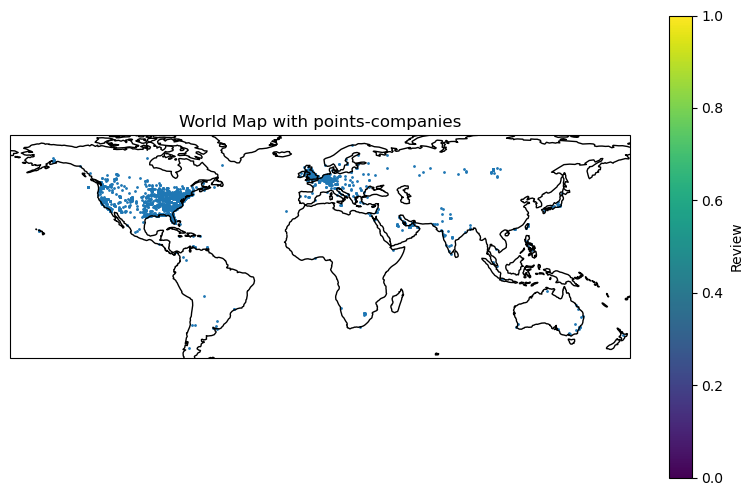

In [71]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Plot points colored by review ratings
sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], cmap='viridis', s=1, transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(sc, label='Review')
plt.title('World Map with points-companies')
plt.show()

Despite the previous observations that the majority of the companies are in United Arab Emirates we can see USA on the map. Let's check if the column 'country' always corresponds to the latitude, longitude, city and timezone

In [68]:
 #checking for errors with Arab Emirates - they appear on the map in different countries
d1 = df[df['longitude']<0]
d1[d1['country']=='United Arab Emirates']


,business_id,phone_number,name,full_address,latitude,longitude,review_count,rating,timezone,website,...,Tuesday_afternoon,Tuesday_evening,Wednesday_morning,Wednesday_afternoon,Wednesday_evening,Thursday_morning,Thursday_afternoon,Thursday_evening,geo_cluster,country
3427,0x87528b177a41efad:0x48edd010179794d0,13852348031,"Laundry Service, SLC",Unknown,40.668008,-111.906702,33.0,5.0,America/Denver,http://laundryserviceslc.com/,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
3464,0x88569101a9bc392d:0x92f2bb060b4d1070,19804988979,Your Laundry is Done,Unknown,35.169449,-80.839829,5.0,5.0,America/New_York,http://yourlaundryisdone.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
3474,0x88388ebe44d44c2f:0x754cfa1092a82a64,18008256553,Push Laundry - Columbus,Unknown,39.969036,-83.011352,19.0,3.3,America/New_York,https://www.pushlaundry.com/locations/columbus,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
4492,0x8b0b8e042b19856b:0x44a22fbbb6a64213,18448337302,Reliable Insurance Managers,Unknown,46.423669,-129.942709,32.0,4.4,America/Detroit,http://www.reliableins.net/,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
5227,0x8ba9f7e168cd86a3:0x3ff46d6ba4890c0f,12232376369,Underground Painting,Unknown,40.251349,-76.938912,13.0,5.0,America/New_York,https://m.facebook.com/people/Underground-Pain...,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12510,0xa6c514b6da6e154d:0x849181878e4bb4b,13162026521,Pinelux Exteriors LLC,Unknown,38.299141,-97.482226,32.0,4.4,America/Chicago,https://www.pinelux.com/,...,0,0,0,0,0,0,0,0,1.0,United Arab Emirates
12531,0x6dc8e1a355ac6913:0xeff4521bda05033c,15095916010,J.A.T Roofing,Unknown,46.197467,-119.177030,32.0,4.4,America/Los_Angeles,Unknown,...,0,0,0,0,0,0,0,0,3.0,United Arab Emirates
14520,0x5351e55555555555:0xaca8f930348fe1bb,13073447381,Yellowstone National Park,Yellowstone National Park,44.427963,-110.588455,39647.0,4.8,America/Denver,https://www.nps.gov/yell/index.htm,...,1,1,1,1,1,1,1,1,3.0,United Arab Emirates
14952,0x4a9b1871b7f1d55f:0x25641b6292767dc6,Unknown,AutoSlash,Unknown,46.423669,-129.942709,299.0,4.8,America/Detroit,https://www.autoslash.com/,...,1,1,1,1,1,1,1,1,3.0,United Arab Emirates


**Important observation: the 'country' column may have some mistakes. Many rows which are in USA (long, lat and timezone) have a contry UAE**

c:\Users\rogal\anaconda3\Lib\site-packages\cartopy\mpl\geoaxes.py:1683: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


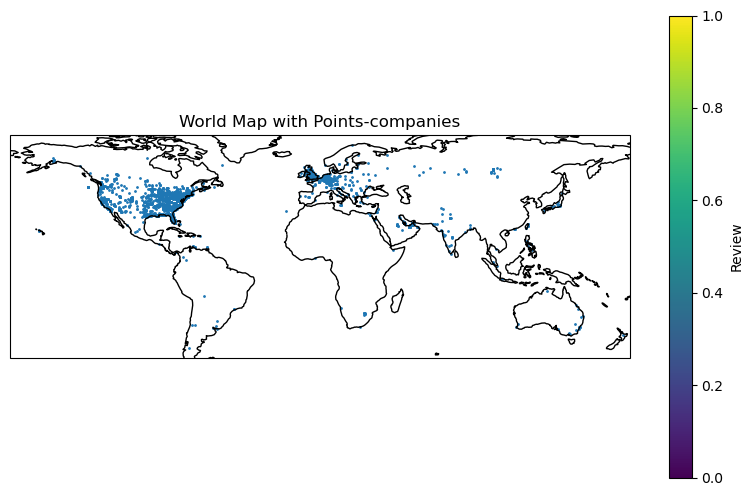

In [72]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Plot points colored by review ratings
sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], cmap='viridis', s=1, transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(sc, label='Review')
plt.title('World Map with Points-companies')
plt.show()

Observations:
* The majority of companies are in USA and west Europe

Let's look at the maps for different regions and coloured by different features. Maybe we will see some patterns

In [74]:
def draw_map(color_col, boundries):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent(boundries)

    # Plot points colored by review ratings
    sc = ax.scatter(coord_df['longitude'], coord_df['latitude'], c= coord_df[color_col],cmap='viridis', s=1, transform=ccrs.PlateCarree())

    plt.colorbar(sc, label=f'{color_col}')
    plt.title('World Map with Points-companies')
    plt.show()

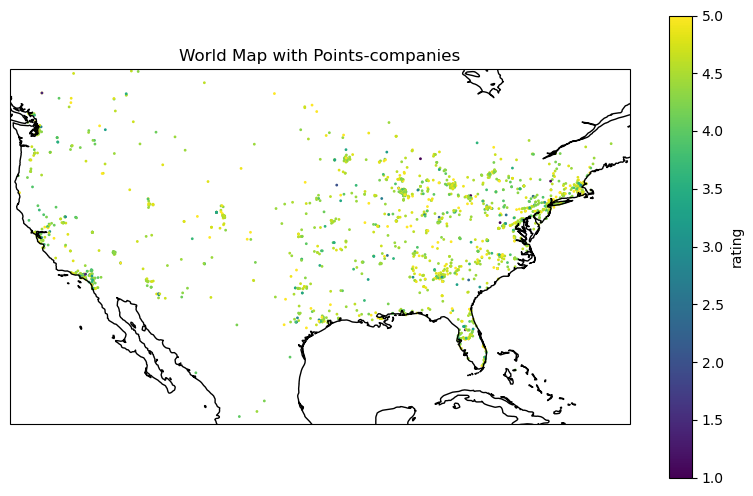

In [78]:
draw_map('rating', [-125, -66.5, 20, 50]) # USA

Observations:
* The majority of companies are on the east side
* There are not many observations with bad reviews

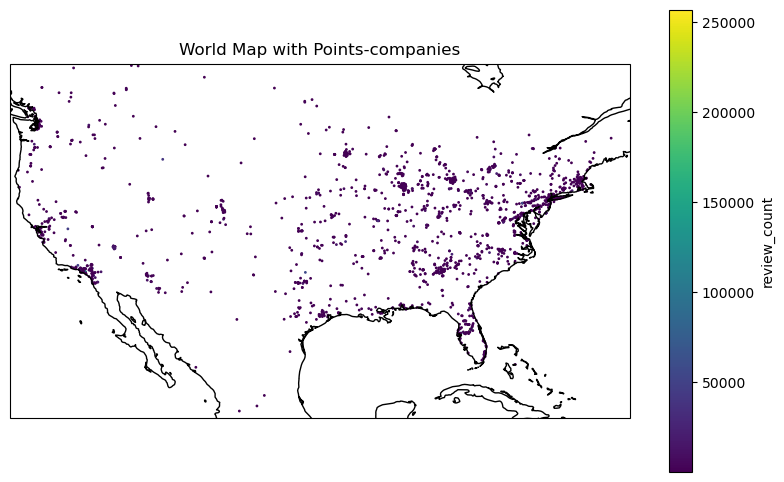

In [79]:
draw_map('review_count', [-125, -66.5, 20, 50])

* every company has under 50k reviews, no pattern